In [1]:
# -*-coding:utf-8 -*
# importer les packages
%pylab inline
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from functools import reduce
from pandas import DataFrame, Series
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import ast
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import json  
from pandas.io.json import json_normalize  

In [3]:
# Installer le package missingno

!pip install missingno

In [4]:
import missingno as msno

<b> Les Data <b>

In [5]:
# Lire le fichier des données  "2015-building-energy-benchmarking"

df_2015=pd.read_csv("2015-building-energy-benchmarking.csv")


In [6]:
df_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [7]:
# Lire le fichier des données  "2016-building-energy-benchmarking"

df_2016=pd.read_csv("2016-building-energy-benchmarking.csv")
df_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [8]:
df_2015.shape

(3340, 47)

In [9]:
df_2016.shape

(3376, 46)

In [10]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [11]:
df_2015.isnull().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

In [12]:
df_2016.shape

(3376, 46)

In [13]:
df_2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


<b> Les Metadata <b>

In [14]:
with open("socrata_metadata_2015-building-energy-benchmarking.json") as jsonfile:
    metadata_2015_json = json.load(jsonfile)
    metadata_2015 = json_normalize(metadata_2015_json)

with open("socrata_metadata_2016-building-energy-benchmarking.json") as jsonfile:
    metadata_2016_json = json.load(jsonfile)
    metadata_2016 = json_normalize(metadata_2016_json)

/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_3017/1094060957.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  metadata_2015 = json_normalize(metadata_2015_json)
/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_3017/1094060957.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  metadata_2016 = json_normalize(metadata_2016_json)


In [15]:
#metadata_2015

In [16]:
metadata_2015.shape

(1, 53)

In [17]:
metadata_2016.shape

(1, 54)

In [18]:

metadata = pd.concat([metadata_2015, metadata_2016], axis=0, sort=True).reset_index()
#metadata

In [19]:
metadata.shape

(2, 58)

<b> Harmonisation des datasets <b>

In [20]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [21]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [22]:
# Verification des types 
pd.DataFrame([df_2015.dtypes, df_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Address,City,State,ZipCode,Latitude,Longitude,Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,int64,int64,object,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,float64,float64,float64,int64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,int64,int64,object,object,object,object,NaN,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,NaN,NaN,NaN,bool,NaN,object,object,NaN,NaN,NaN,NaN,NaN,object,object,object,float64,float64,float64,float64,float64,float64


In [23]:
# Cleaning new columns of the dataframe

df_2015['latitude']= df_2015['Location'].apply(lambda x: ast.literal_eval(x)['latitude'])

In [24]:
df_2015['longitude']= df_2015['Location'].apply(lambda x: ast.literal_eval(x)['longitude'])

In [25]:
df_2015['address']= df_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['address'])

In [26]:
df_2015['city']= df_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['city'])

In [27]:
df_2015['state']= df_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['state'])

In [28]:
df_2015['zip']= df_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['zip'])

In [29]:
df_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101


In [30]:
df_2015.rename(columns = {'Zip Codes':'ZipCode','latitude':'Latitude', 'longitude':'Longitude', 'address':'Address', 'city':'City', 'state':'State'}, inplace = True)

In [31]:
df_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101


In [32]:
df_2015.shape

(3340, 53)

In [33]:
# Suppression de la colonne 'Location'

df_2015.drop('Location', axis=1, inplace=True)

In [34]:
df_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101


In [35]:
df_2015.shape

(3340, 52)

In [36]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment',
       'C

In [37]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [38]:
df_2015.shape

(3340, 52)

In [39]:
df_2016.shape

(3376, 46)

In [40]:
# Finding Common columns
#----------------------------------------------------------
a = np.intersect1d(df_2015.columns, df_2016.columns)
 
# Printing common columns
print ("Common Columns:",a)

Common Columns: ['Address' 'BuildingType' 'City' 'ComplianceStatus' 'CouncilDistrictCode'
 'DataYear' 'DefaultData' 'ENERGYSTARScore' 'Electricity(kBtu)'
 'Electricity(kWh)' 'LargestPropertyUseType' 'LargestPropertyUseTypeGFA'
 'Latitude' 'ListOfAllPropertyUseTypes' 'Longitude' 'NaturalGas(kBtu)'
 'NaturalGas(therms)' 'Neighborhood' 'NumberofBuildings' 'NumberofFloors'
 'OSEBuildingID' 'Outlier' 'PrimaryPropertyType' 'PropertyGFABuilding(s)'
 'PropertyGFAParking' 'PropertyGFATotal' 'PropertyName'
 'SecondLargestPropertyUseType' 'SecondLargestPropertyUseTypeGFA'
 'SiteEUI(kBtu/sf)' 'SiteEUIWN(kBtu/sf)' 'SiteEnergyUse(kBtu)'
 'SiteEnergyUseWN(kBtu)' 'SourceEUI(kBtu/sf)' 'SourceEUIWN(kBtu/sf)'
 'State' 'SteamUse(kBtu)' 'TaxParcelIdentificationNumber'
 'ThirdLargestPropertyUseType' 'ThirdLargestPropertyUseTypeGFA'
 'YearBuilt' 'YearsENERGYSTARCertified' 'ZipCode']


In [41]:
type(a)

numpy.ndarray

In [42]:
# Number of elements of a

count_nonzero(a)

43

In [43]:
df_2015.columns.difference(df_2016.columns)
#Index([u'D'], dtype='object')

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas', 'zip'],
      dtype='object')

In [44]:
df_2016.columns.difference(df_2015.columns)

Index(['Comments', 'GHGEmissionsIntensity', 'TotalGHGEmissions'], dtype='object')

In [45]:
# Drop these columns of df_2015,  ['2010 Census Tracts', 'City Council Districts',
#        'OtherFuelUse(kBtu)', 'SPD Beats',
#      'Seattle Police Department Micro Community Policing Plan Areas', 'zip']
#-------------------------------------------------------------------------------------------
list_2015=['2010 Census Tracts', 'City Council Districts','OtherFuelUse(kBtu)', 'SPD Beats',
          'Seattle Police Department Micro Community Policing Plan Areas', 'zip']

df_2015.drop(list_2015, axis=1, inplace=True)

In [46]:
# Rename the columns of df_2015

df_2015.rename(columns = {'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity', 'Comment':'Comments'}, inplace = True)

In [47]:
# Rename the columns of df_2016
#----------------------------------------------------------
df_2016.rename(columns = {'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'}, inplace = True)

In [48]:
df_2016.columns.difference(df_2015.columns)

Index([], dtype='object')

In [49]:
df_2015.shape

(3340, 46)

In [50]:
df_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,NaN,Compliant,NaN,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,NaN,Compliant,NaN,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA


In [51]:
# Re-order columns of df_2015 based on df_2016
#----------------------------------------------------------
df_2015 = df_2015[df_2016.columns]

In [52]:
df_2015.shape

(3340, 46)

In [53]:
df_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,18081,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,18081,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38


In [54]:
df_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [55]:
df_2016.shape

(3376, 46)

In [56]:
# Changer le type de 'Latitude','Longitude'

df_2015[['Latitude','Longitude']] = df_2015[['Latitude','Longitude']].astype('float64')

In [57]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   Address                          3340 non-null   object 
 6   City                             3340 non-null   object 
 7   State                            3340 non-null   object 
 8   ZipCode                          3340 non-null   int64  
 9   TaxParcelIdentificationNumber    3338 non-null   object 
 10  CouncilDistrictCode              3340 non-null   int64  
 11  Neighborhood                     3340 non-null   object 
 12  Latitude            

<AxesSubplot:>

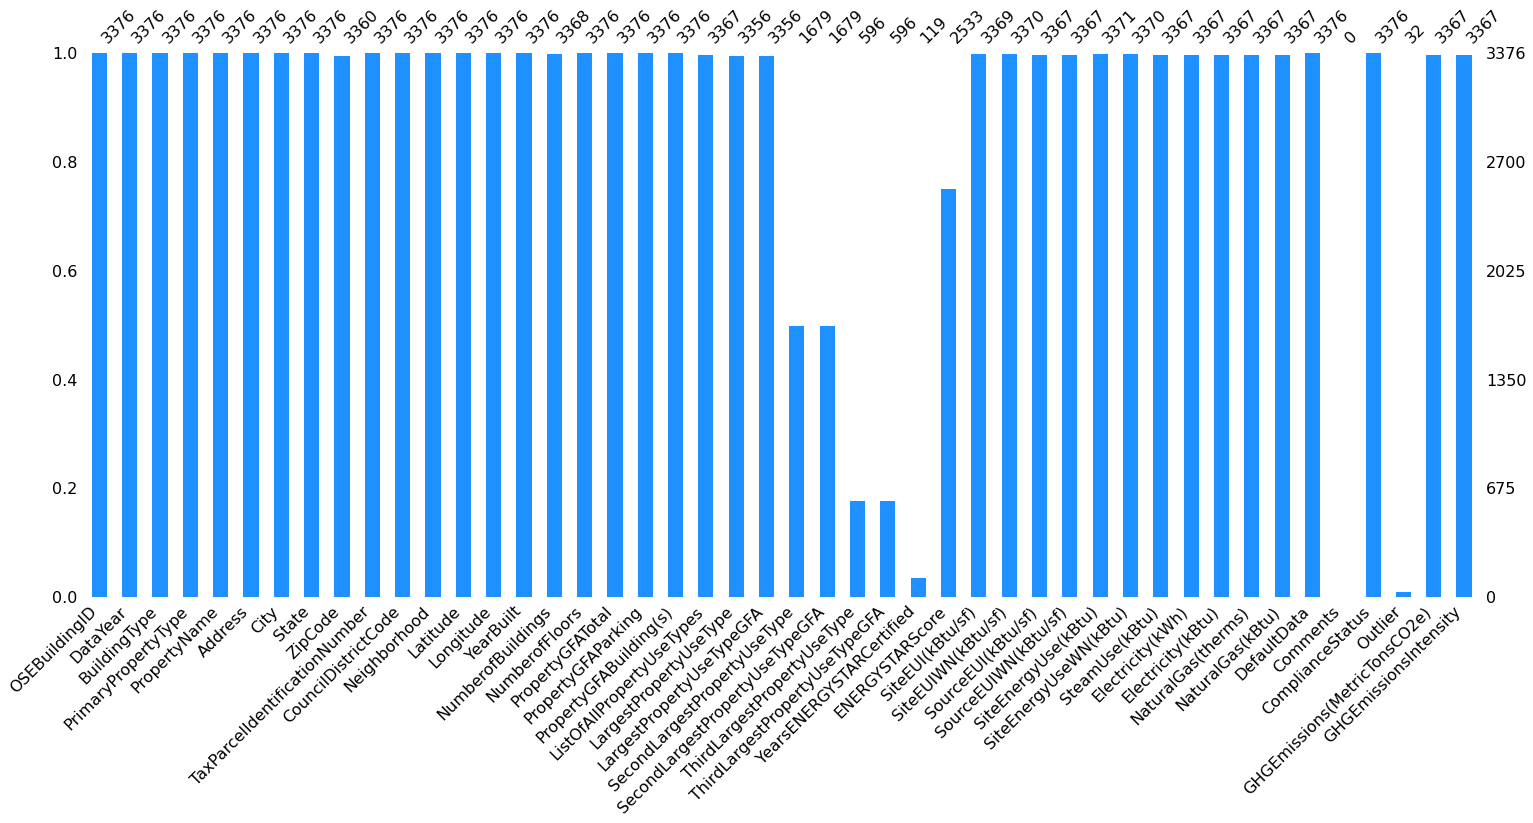

In [58]:
# To display the missing values in the dataframe

msno.bar(df_2016,color="dodgerblue")

In [59]:
# Concatenation des dataframes " df_2015, df_2016"

df_1516 = pd.concat([df_2015, df_2016], ignore_index=True)

In [60]:
df_1516.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [61]:
df_1516.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,18081.0,659000030,7,DOWNTOWN,47.612190,-122.337997,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,18081.0,659000220,7,DOWNTOWN,47.613106,-122.333358,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,18081.0,659000475,7,DOWNTOWN,47.613349,-122.337699,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Yes,NaN,Compliant,NaN,2061.48,1.92


In [62]:
df_1516.shape

(6716, 46)

<AxesSubplot:>

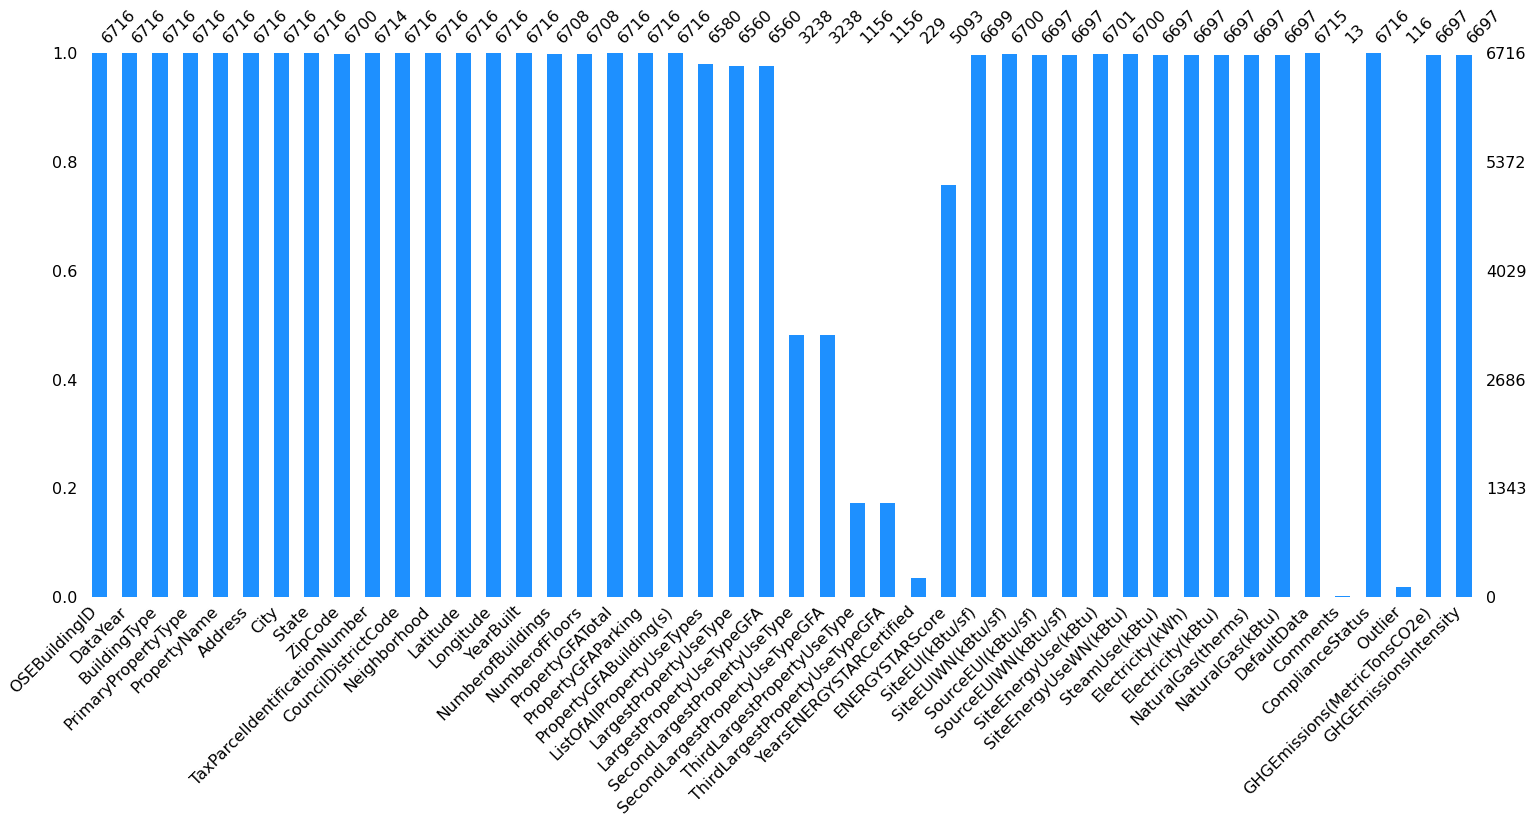

In [63]:
# To display the missing values in the dataframe

msno.bar(df_1516,color="dodgerblue")

In [64]:
# Number of duplicate values  
df_1516.duplicated(subset=None, keep=False).sum()

0

In [65]:
df_1516.shape

(6716, 46)

In [66]:
from scipy import stats
#df_1516[(np.abs(stats.zscore(df_1516)) < 3).all(axis=1)]

In [67]:
df_1516.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [68]:
df_1516['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [69]:
df_1516['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [70]:
# Crosstab des variables 'BuildingType' et 'PrimaryPropertyType'

df_cross=pd.crosstab(df_1516['BuildingType'],df_1516['PrimaryPropertyType'])
df_cross

PrimaryPropertyType,College/University,Distribution Center,Distribution Center\n,High-Rise Multifamily,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mid-Rise Multifamily,Mixed Use Property,Non-Refrigerated Warehouse,Office,Other,Refrigerated Warehouse,Residence Hall,Residence Hall/Dormitory,Restaurant,Restaurant\n,Retail Store,SPS-District K-12,Self-Storage Facility,Self-Storage Facility\n,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,Supermarket/Grocery Store,University,Warehouse,Worship Facility
BuildingType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Campus,5,0,0,0,0,0,8,0,2,2,0,0,7,0,0,14,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0
Multifamily HR (10+),0,0,0,208,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0
Multifamily LR (1-4),1,0,0,0,0,0,0,0,0,1980,0,1,23,0,0,8,0,0,0,0,0,0,0,0,0,31,2,0,0,1,0,0
Multifamily MR (5-9),0,0,0,0,0,0,0,0,0,0,0,1102,16,0,0,2,0,2,0,0,0,0,0,0,0,12,0,0,0,0,0,0
NonResidential,16,53,49,0,20,149,78,11,335,3,80,0,201,181,0,380,25,21,15,12,10,191,0,29,27,39,580,40,36,17,180,143
Nonresidential COS,0,2,2,0,0,0,0,0,7,0,2,0,12,6,3,104,0,0,0,0,0,0,0,0,0,0,8,0,0,0,7,0
Nonresidential WA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
SPS-District K-12,0,0,0,0,0,0,189,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0


In [71]:
df_cross.shape

(8, 32)

In [72]:
df_1516.shape

(6716, 46)

<b> Filtrage du Dataset suivant les buildings nonresidential<b>

In [73]:
# filtrer le dataset  df_1516  pour ne garder que les types de buildings 'NonResidential'

df1516=df_1516[(df_1516['BuildingType']=='NonResidential')|(df_1516['BuildingType']=='Nonresidential COS')|(df_1516['BuildingType']=='Nonresidential WA')
                 |(df_1516['BuildingType']=='Campus')|(df_1516['BuildingType']=='SPS-District K-12')
                 ]
df1516.head(2)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,18081.0,659000030,7,DOWNTOWN,47.612190,-122.337997,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,18081.0,659000220,7,DOWNTOWN,47.613106,-122.333358,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38


In [74]:
df1516.shape

(3318, 46)

<AxesSubplot:>

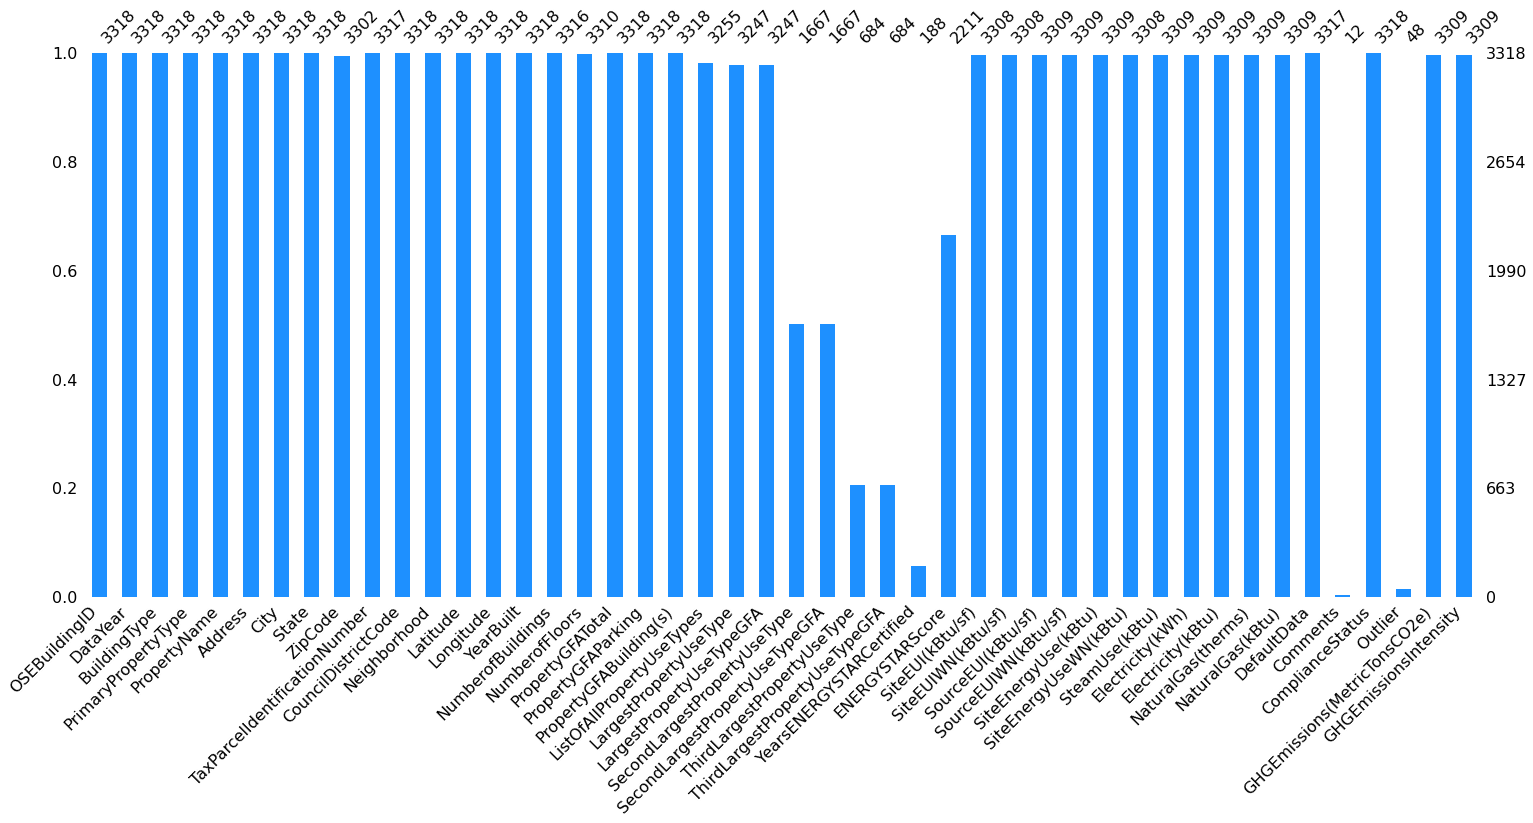

In [75]:
msno.bar(df1516,color="dodgerblue")

In [76]:
# To display percentage of the missing values in the dataframe

null_percent = df1516.isnull().sum() / df1516.shape[0]
#null_percent.value_counts

In [77]:
df1516.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 6715
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   PropertyName                     3318 non-null   object 
 5   Address                          3318 non-null   object 
 6   City                             3318 non-null   object 
 7   State                            3318 non-null   object 
 8   ZipCode                          3302 non-null   float64
 9   TaxParcelIdentificationNumber    3317 non-null   object 
 10  CouncilDistrictCode              3318 non-null   int64  
 11  Neighborhood                     3318 non-null   object 
 12  Latitude            

In [78]:
# Creation d'une variable :  Build_age =  YearBuilt - DataYear

df1516['Building_age'] = df1516['DataYear'] - df1516['YearBuilt']


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_3017/2686447830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1516['Building_age'] = df1516['DataYear'] - df1516['YearBuilt']


In [79]:
df1516[['Building_age']]

,Building_age
0,88
1,19
2,46
3,89
4,35
...,...
6711,26
6712,12
6713,42
6714,27


In [80]:
df1516.shape

(3318, 47)

In [81]:
df1516.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 6715
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   PropertyName                     3318 non-null   object 
 5   Address                          3318 non-null   object 
 6   City                             3318 non-null   object 
 7   State                            3318 non-null   object 
 8   ZipCode                          3302 non-null   float64
 9   TaxParcelIdentificationNumber    3317 non-null   object 
 10  CouncilDistrictCode              3318 non-null   int64  
 11  Neighborhood                     3318 non-null   object 
 12  Latitude            

<b> Choix des variables pertinentes et des variables cibles (targets) <b>

In [82]:
# Choisir la liste des variables pertinentes dans le dataset "df1516" 
#-----------------------------------------------------------------------------------
var_pert=['BuildingType','PrimaryPropertyType','NumberofBuildings', 'NumberofFloors', 
           'ENERGYSTARScore','Latitude','Longitude', 
          'PropertyGFAParking','PropertyGFABuilding(s)', 'Building_age']

In [83]:
# Choisir la liste des variables cibles  dans le dataset "df1516"

var_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']

In [84]:
len(var_pert)

10

In [85]:
var_cp= var_pert + var_cible

In [86]:
len(var_cp)

12

In [87]:
df1=df1516[var_cp]
df1.head(5)

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,NonResidential,Hotel,1.0,12.0,65.0,47.612190,-122.337997,0,88434,88,6981428.0,249.43
1,NonResidential,Hotel,1.0,11.0,51.0,47.613106,-122.333358,15064,88502,19,8354235.0,263.51
2,NonResidential,Hotel,1.0,41.0,18.0,47.613349,-122.337699,0,961990,46,73130656.0,2061.48
3,NonResidential,Hotel,1.0,10.0,1.0,47.614216,-122.336609,0,61320,89,28229320.0,1936.34
4,NonResidential,Hotel,1.0,18.0,67.0,47.613754,-122.340924,12460,107430,35,14829099.0,507.70


In [88]:
df1.shape

(3318, 12)

In [89]:
df1.isna().sum()

BuildingType                       0
PrimaryPropertyType                0
NumberofBuildings                  2
NumberofFloors                     8
ENERGYSTARScore                 1107
Latitude                           0
Longitude                          0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
Building_age                       0
SiteEnergyUse(kBtu)                9
GHGEmissions(MetricTonsCO2e)       9
dtype: int64

<Figure size 432x288 with 0 Axes>

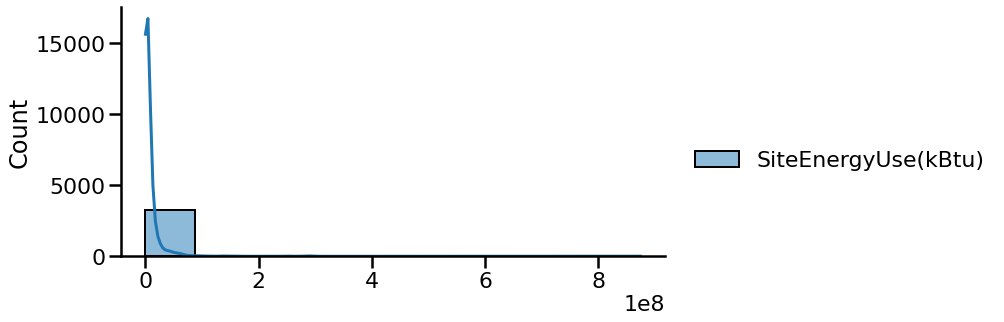

In [90]:
plt.figure()
sns.set_context('poster', font_scale = 1)
sns.displot(data=df1[['SiteEnergyUse(kBtu)']].dropna(), bins = 10, kde=True,  aspect = 2)
plt.show()

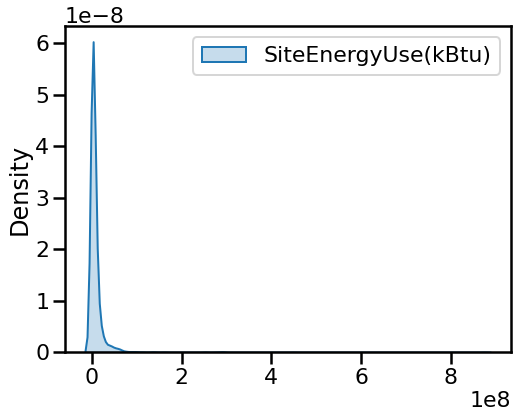

In [91]:
# kde plot using seaborn
plt.figure(figsize=(8,6))
sns.set_context('poster', font_scale = 1)
sns.kdeplot(data=df1[['SiteEnergyUse(kBtu)']], shade=True, color='red')
plt.show()

<Figure size 432x288 with 0 Axes>

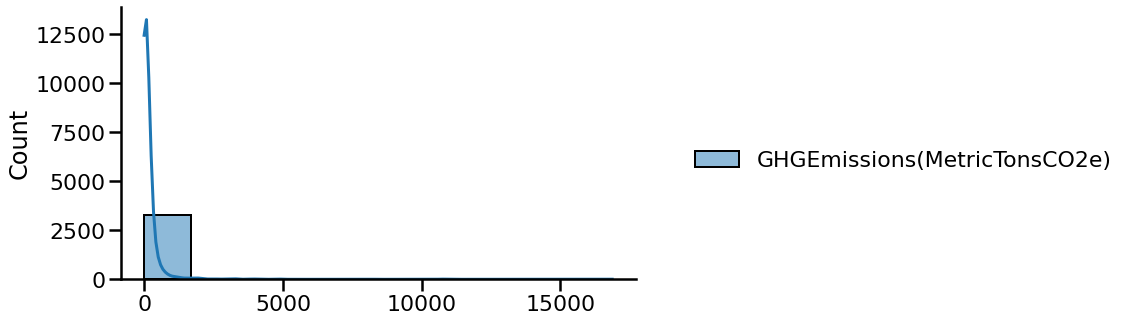

In [92]:
plt.figure()
sns.set_context('poster', font_scale = 1)
sns.displot(data=df1[['GHGEmissions(MetricTonsCO2e)']].dropna(), bins = 10, kde=True,  aspect = 2)
plt.show()

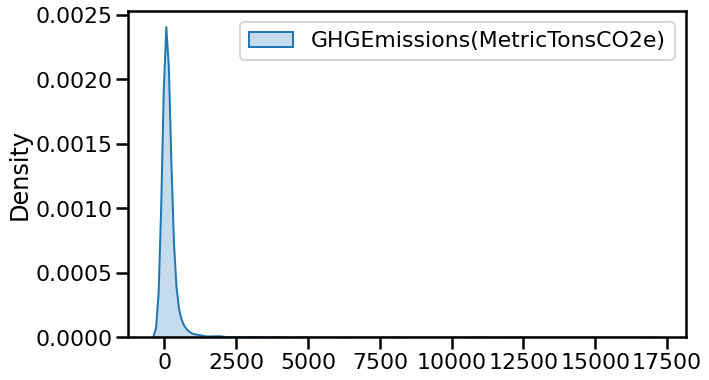

In [93]:
# kde plot using seaborn
plt.figure(figsize=(10,6))
sns.set_context('poster', font_scale = 1)
sns.kdeplot(data=df1[['GHGEmissions(MetricTonsCO2e)']], shade=True, color='red')
plt.show()

In [94]:
features_num=df1.select_dtypes(include=np.number).columns.tolist()
features_num

['NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'Latitude',
 'Longitude',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'Building_age',
 'SiteEnergyUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)']

In [95]:
features_cat=df1.select_dtypes(include=object).columns.tolist()
features_cat

['BuildingType', 'PrimaryPropertyType']

In [96]:
df2=df1[features_num]
df2

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,1.0,12.0,65.0,47.612190,-122.337997,0,88434,88,6.981428e+06,249.43
1,1.0,11.0,51.0,47.613106,-122.333358,15064,88502,19,8.354235e+06,263.51
2,1.0,41.0,18.0,47.613349,-122.337699,0,961990,46,7.313066e+07,2061.48
3,1.0,10.0,1.0,47.614216,-122.336609,0,61320,89,2.822932e+07,1936.34
4,1.0,18.0,67.0,47.613754,-122.340924,12460,107430,35,1.482910e+07,507.70
...,...,...,...,...,...,...,...,...,...,...
6711,1.0,1.0,46.0,47.567220,-122.311540,0,12294,26,8.497457e+05,20.94
6712,1.0,1.0,NaN,47.596250,-122.322830,0,16000,12,9.502762e+05,32.17
6713,1.0,1.0,NaN,47.636440,-122.357840,0,13157,42,5.765898e+06,223.54
6714,1.0,1.0,NaN,47.528320,-122.324310,0,14101,27,7.194712e+05,22.11


In [97]:
df2.describe()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
count,3316.000000,3310.000000,2211.000000,3318.000000,3318.000000,3318.000000,3.318000e+03,3318.000000,3.309000e+03,3309.000000
mean,1.117310,4.126888,64.815920,47.616006,-122.333051,13303.304702,1.023639e+05,53.965943,8.068625e+06,177.038779
std,2.219845,6.567333,28.549886,0.048102,0.024535,43596.620504,2.340749e+05,32.707800,2.525462e+07,666.442480
min,0.000000,0.000000,1.000000,47.499170,-122.411820,-2.000000,-5.055000e+04,1.000000,0.000000e+00,-0.800000
25%,1.000000,1.000000,47.000000,47.585595,-122.343357,0.000000,2.850775e+04,27.000000,1.223425e+06,19.720000
50%,1.000000,2.000000,72.000000,47.612313,-122.333019,0.000000,4.736800e+04,50.000000,2.505271e+06,49.160000
75%,1.000000,4.000000,89.000000,47.649156,-122.321825,0.000000,9.447150e+04,86.000000,6.917280e+06,138.870000
max,111.000000,99.000000,100.000000,47.733870,-122.258640,512608.000000,9.320156e+06,116.000000,8.739237e+08,16870.980000


<b>Analyse univariée<b>

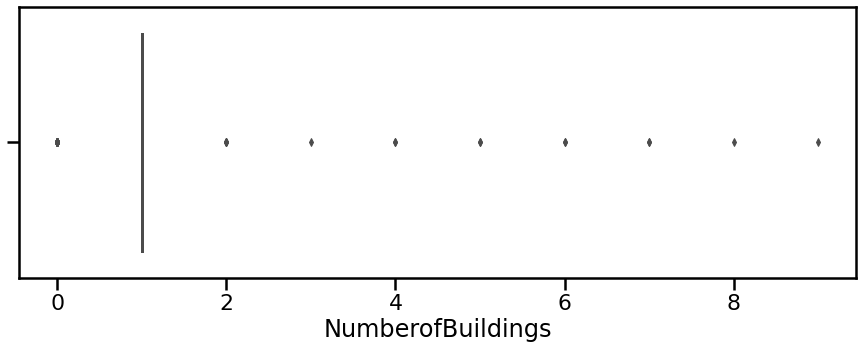

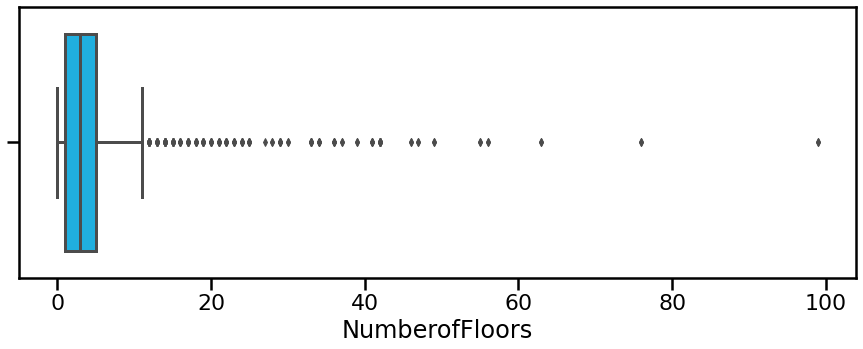

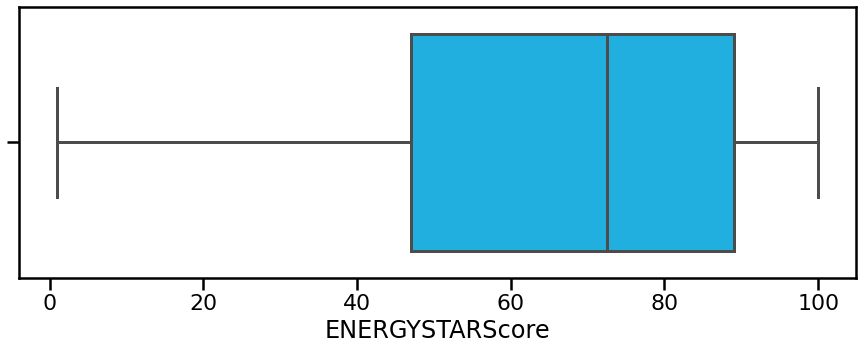

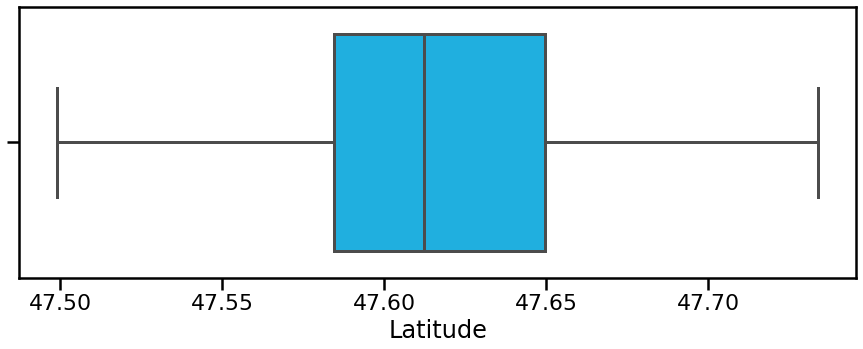

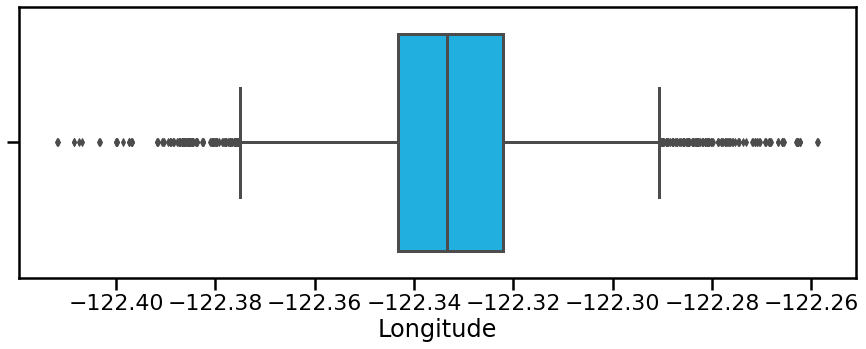

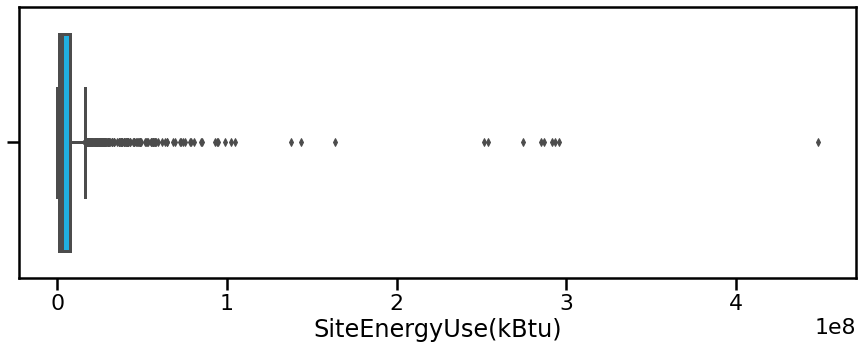

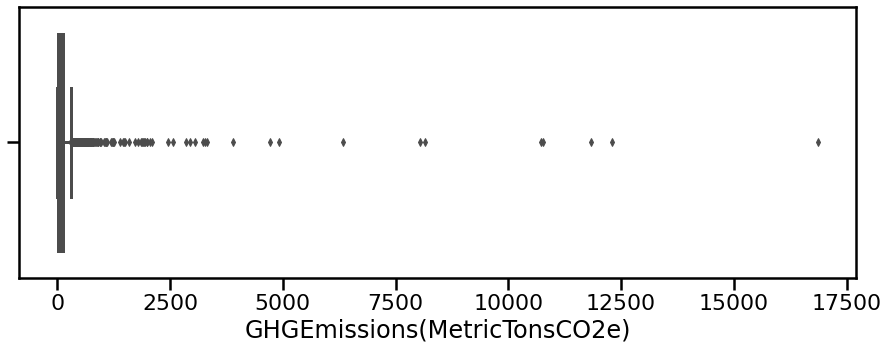

In [98]:

np.random.seed(0)
ind = np.random.randint(len(df2), size= (len(df2)//2))
df3 = df2.iloc[ind,:]
df3 = df3.select_dtypes('float')

for col in df3.columns:
    plt.figure(figsize=(15,5))
    sns.set_context('poster', font_scale = 1)
    ax = sns.boxplot(x=col, data=df2.dropna(), color='deepskyblue')
    
plt.show()

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 6715
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuildingType                  3318 non-null   object 
 1   PrimaryPropertyType           3318 non-null   object 
 2   NumberofBuildings             3316 non-null   float64
 3   NumberofFloors                3310 non-null   float64
 4   ENERGYSTARScore               2211 non-null   float64
 5   Latitude                      3318 non-null   float64
 6   Longitude                     3318 non-null   float64
 7   PropertyGFAParking            3318 non-null   int64  
 8   PropertyGFABuilding(s)        3318 non-null   int64  
 9   Building_age                  3318 non-null   int64  
 10  SiteEnergyUse(kBtu)           3309 non-null   float64
 11  GHGEmissions(MetricTonsCO2e)  3309 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 337.0+ KB


<Figure size 432x288 with 0 Axes>

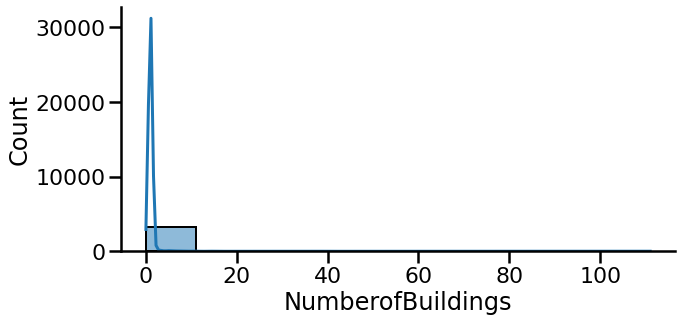

<Figure size 432x288 with 0 Axes>

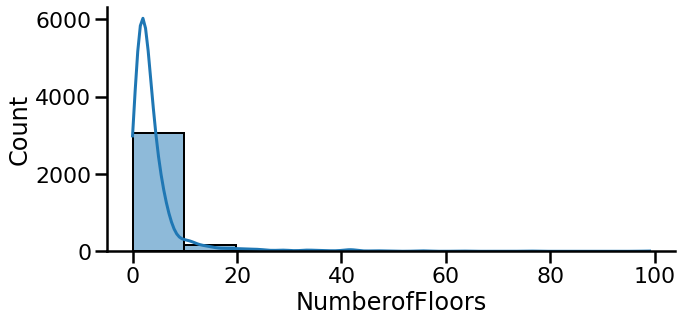

<Figure size 432x288 with 0 Axes>

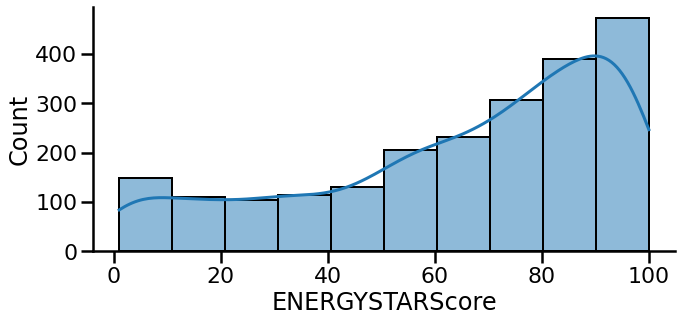

<Figure size 432x288 with 0 Axes>

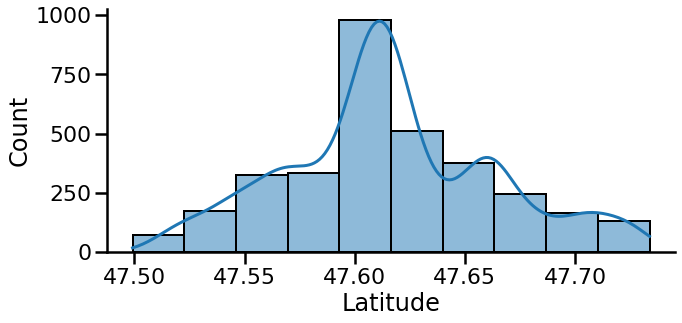

<Figure size 432x288 with 0 Axes>

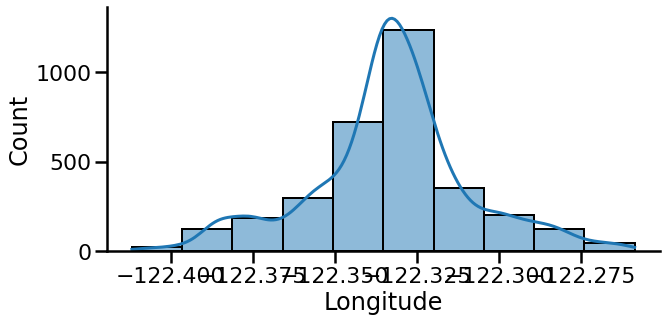

<Figure size 432x288 with 0 Axes>

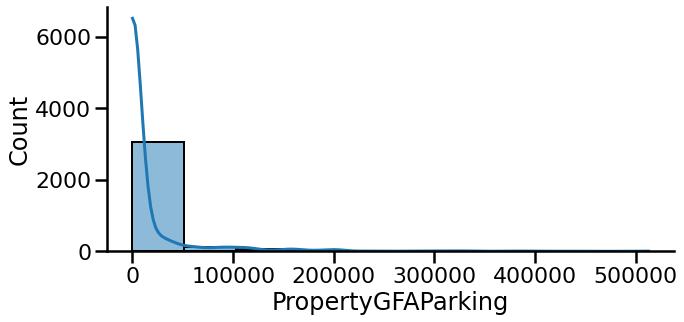

<Figure size 432x288 with 0 Axes>

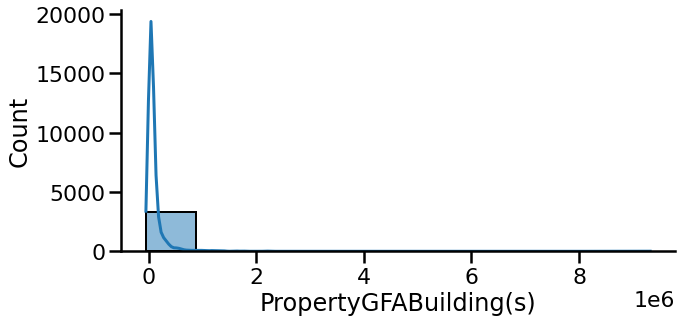

<Figure size 432x288 with 0 Axes>

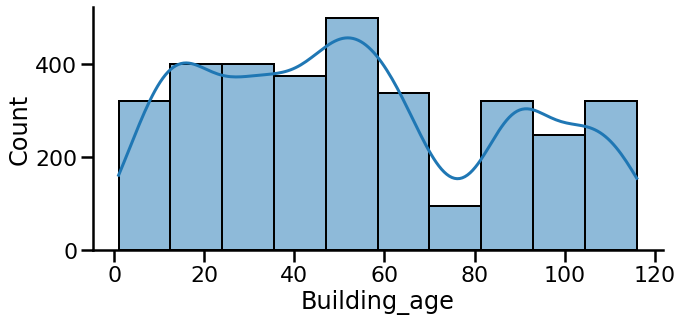

In [100]:
# Distribution des variables pertinentes 

var_pert=['BuildingType','PrimaryPropertyType','NumberofBuildings', 'NumberofFloors', 
           'ENERGYSTARScore','Latitude','Longitude', 
          'PropertyGFAParking','PropertyGFABuilding(s)', 'Building_age']

df4=df1[var_pert]

np.random.seed(0)
ind = np.random.randint(len(df4), size= (len(df4)//2))
df5 = df4.iloc[ind,:]
df5 = df5.select_dtypes('number')
for col in df5.columns:
    
    plt.figure()
    sns.set_context('poster', font_scale = 1)
    sns.displot(data=df4[col].dropna(), bins = 10, kde=True,  aspect = 2)
    plt.show()

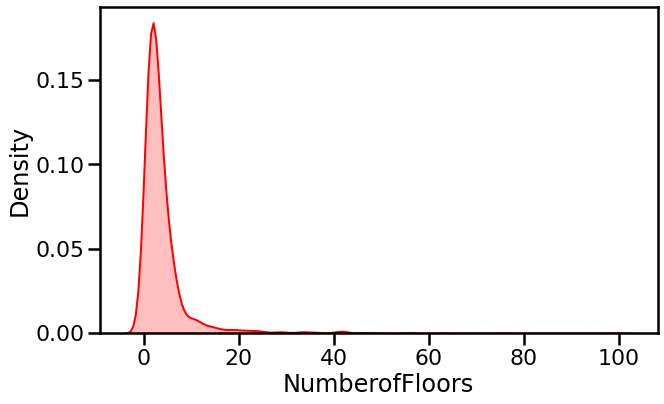

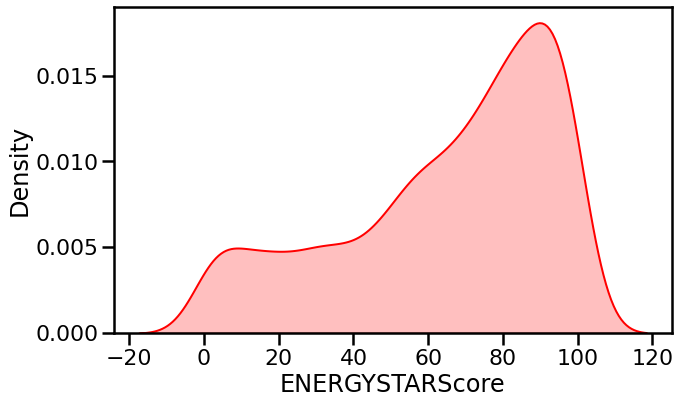

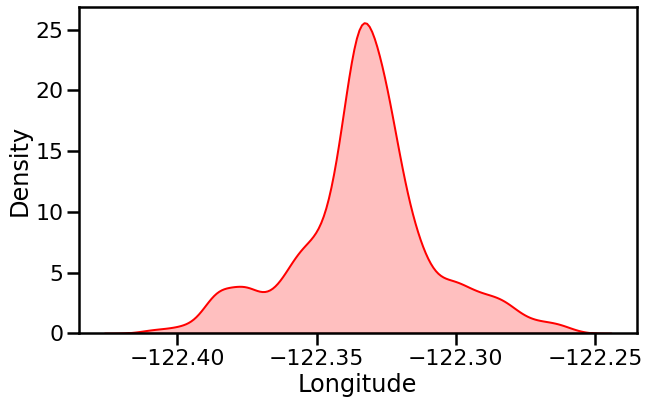

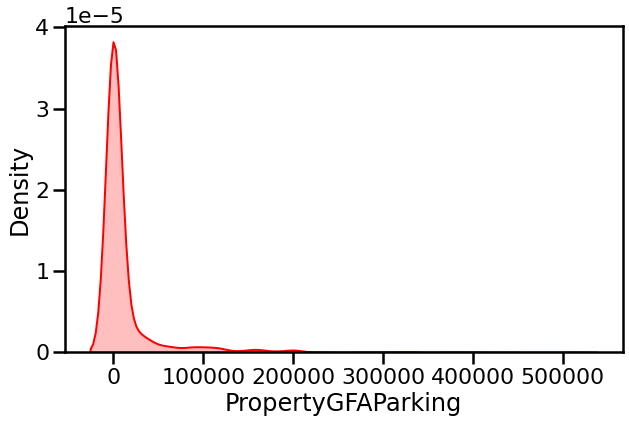

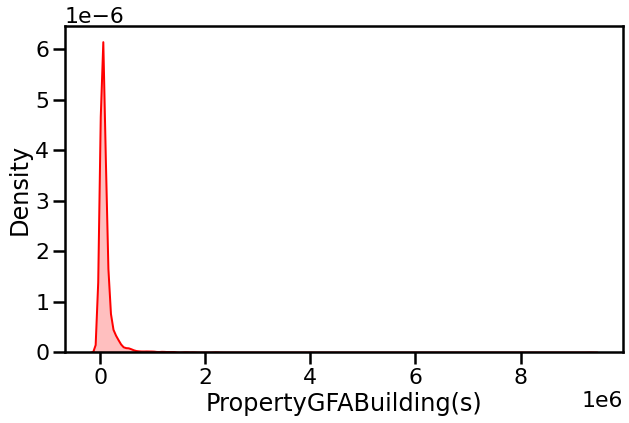

In [101]:
coln =['NumberofFloors', 'ENERGYSTARScore','Longitude','PropertyGFAParking','PropertyGFABuilding(s)']
    # kde plot of features
for var in coln:
    plt.figure(figsize=(10,6))
    sns.set_context('poster', font_scale = 1)
    sns.kdeplot(data=df1[var], shade=True, color='red')
    plt.show()

In [102]:
df1.shape

(3318, 12)

In [103]:
df1 = df1.dropna(subset=['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'])

In [104]:
df1.shape

(3309, 12)

In [105]:
df1[['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']].min()

SiteEnergyUse(kBtu)             0.0
GHGEmissions(MetricTonsCO2e)   -0.8
dtype: float64

In [106]:
df1[['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']].max()

SiteEnergyUse(kBtu)             8.739237e+08
GHGEmissions(MetricTonsCO2e)    1.687098e+04
dtype: float64

In [107]:
df1.shape

(3309, 12)

<b> Analyse bivariée <b>

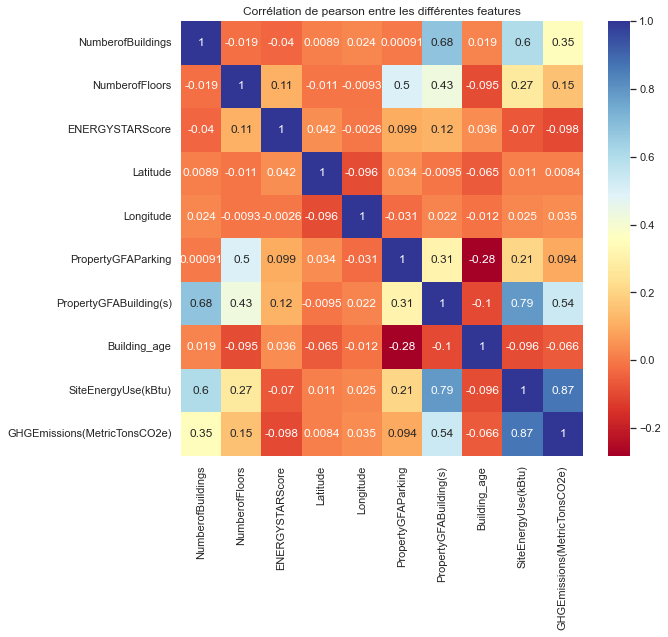

In [108]:
# Using Pearson Correlation ( function corr) to plot all correlations
plt.figure(figsize=(9,8))
sns.set(font_scale=1)
plt.title('Corrélation de pearson entre les différentes features')

cor = df2.corr()
ax = sns.heatmap(cor,annot=True, cmap=plt.cm.RdYlBu)
plt.show()
sns.set(font_scale=1)

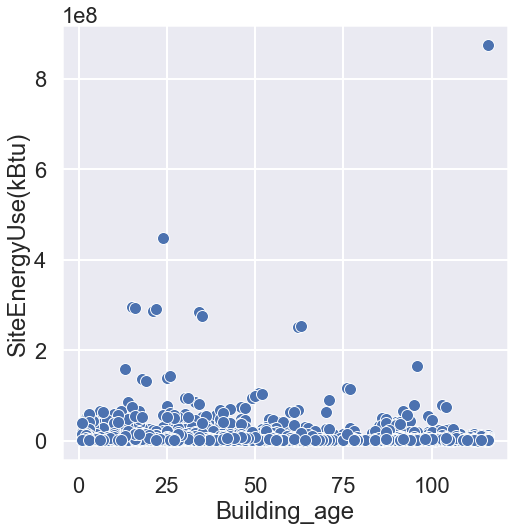

In [109]:
# correlation entre variables numeriques

np.random.seed(0)
ind = np.random.randint(len(df2), size= (len(df2)//2))
df3 = df2.iloc[ind,:]
df3 = df3.select_dtypes('float')


plt.figure(figsize=(8,8))
sns.set_context('poster', font_scale = 1)
sns.scatterplot(data=df2, x='Building_age', y='SiteEnergyUse(kBtu)' )
  
plt.show()

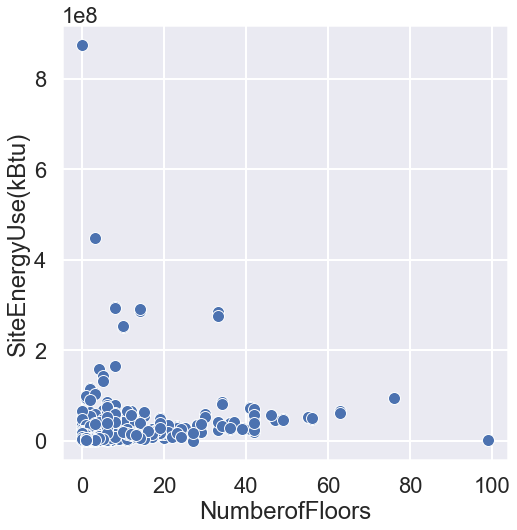

In [110]:
# correlation entre variables numeriques

np.random.seed(0)
ind = np.random.randint(len(df2), size= (len(df2)//2))
df3 = df2.iloc[ind,:]
df3 = df3.select_dtypes('float')


plt.figure(figsize=(8,8))
sns.set_context('poster', font_scale = 1)
sns.scatterplot(data=df2, x='NumberofFloors', y='SiteEnergyUse(kBtu)' )
  
plt.show()

In [111]:
df1.shape

(3309, 12)

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 6715
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuildingType                  3309 non-null   object 
 1   PrimaryPropertyType           3309 non-null   object 
 2   NumberofBuildings             3309 non-null   float64
 3   NumberofFloors                3301 non-null   float64
 4   ENERGYSTARScore               2211 non-null   float64
 5   Latitude                      3309 non-null   float64
 6   Longitude                     3309 non-null   float64
 7   PropertyGFAParking            3309 non-null   int64  
 8   PropertyGFABuilding(s)        3309 non-null   int64  
 9   Building_age                  3309 non-null   int64  
 10  SiteEnergyUse(kBtu)           3309 non-null   float64
 11  GHGEmissions(MetricTonsCO2e)  3309 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 336.1+ KB


In [113]:
df1[['SiteEnergyUse(kBtu)']]

,SiteEnergyUse(kBtu)
0,6.981428e+06
1,8.354235e+06
2,7.313066e+07
3,2.822932e+07
4,1.482910e+07
...,...
6711,8.497457e+05
6712,9.502762e+05
6713,5.765898e+06
6714,7.194712e+05


<b> Relation entre les variables <b>

<b> ANOVA <b>

In [114]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('ENERGYSTARScore ~ PrimaryPropertyType', data=df1).fit()

aovRes= sm.stats.anova_lm(model,type=2)
aovRes


,df,sum_sq,mean_sq,F,PR(>F)
PrimaryPropertyType,29.0,2.308179e+05,7959.237989,11.058234,4.989338e-47
Residual,2187.0,1.574108e+06,719.756723,NaN,NaN


In [115]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('PropertyGFAParking ~ PrimaryPropertyType', data=df1).fit()

aovRes= sm.stats.anova_lm(model,type=2)
aovRes


,df,sum_sq,mean_sq,F,PR(>F)
PrimaryPropertyType,29.0,1.211391e+12,4.177210e+10,26.901742,2.725097e-129
Residual,3279.0,5.091519e+12,1.552766e+09,NaN,NaN


In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('PropertyGFAParking ~ BuildingType', data=df1).fit()

aovRes= sm.stats.anova_lm(model,type=2)
aovRes


,df,sum_sq,mean_sq,F,PR(>F)
BuildingType,4.0,4.777452e+10,1.194363e+10,6.308697,0.000047
Residual,3304.0,6.255135e+12,1.893201e+09,NaN,NaN


<b> Chi2 Test <b>

In [117]:
#Crosstab entre les variables  'BuildingType' et 'PrimaryPropertyType'

df1_table=pd.crosstab(df1['BuildingType'], df1['PrimaryPropertyType'])
df1_table

PrimaryPropertyType,College/University,Distribution Center,Distribution Center\n,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Non-Refrigerated Warehouse,Office,Other,Refrigerated Warehouse,Residence Hall,Residence Hall/Dormitory,Restaurant,Restaurant\n,Retail Store,SPS-District K-12,Self-Storage Facility,Self-Storage Facility\n,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,Supermarket/Grocery Store,University,Warehouse,Worship Facility
BuildingType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Campus,5,0,0,0,0,8,0,2,2,0,7,0,0,14,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0
NonResidential,16,53,49,20,149,78,11,335,3,80,200,181,0,380,25,21,15,12,9,191,0,29,27,39,579,40,36,17,180,143
Nonresidential COS,0,2,2,0,0,0,0,7,0,2,12,6,3,104,0,0,0,0,0,0,0,0,0,0,8,0,0,0,7,0
Nonresidential WA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
SPS-District K-12,0,0,0,0,0,183,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0


In [118]:
df1_table.shape

(5, 30)

In [119]:
Oberved_values=df1_table.values
print("Oberved Values : -\n",Oberved_values)

Oberved Values : -
 [[  5   0   0   0   0   8   0   2   2   0   7   0   0  14   0   0   0   1
    1   0   0   0   0   0   0   0   0   6   0   0]
 [ 16  53  49  20 149  78  11 335   3  80 200 181   0 380  25  21  15  12
    9 191   0  29  27  39 579  40  36  17 180 143]
 [  0   2   2   0   0   0   0   7   0   2  12   6   3 104   0   0   0   0
    0   0   0   0   0   0   8   0   0   0   7   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0 183   0   0   0   0   0   0   0   4   0   0   0   0
    0   0   4   0   0   0   0   0   0   0   0   0]]


In [120]:
val= stats.chi2_contingency(df1_table)
val

(3014.898357302835,
 0.0,
 116,
 array([[2.91931097e-01, 7.64581445e-01, 7.08975521e-01, 2.78029616e-01,
         2.07132064e+00, 3.73949834e+00, 1.52916289e-01, 4.78210940e+00,
         6.95074040e-02, 1.13992143e+00, 3.04442430e+00, 2.59957691e+00,
         4.17044424e-02, 6.97854337e+00, 3.47537020e-01, 2.91931097e-01,
         2.08522212e-01, 1.80719251e-01, 1.39014808e-01, 2.65518283e+00,
         5.56059232e-02, 4.03142943e-01, 3.75339982e-01, 5.42157752e-01,
         8.16016924e+00, 5.56059232e-01, 5.00453309e-01, 3.33635539e-01,
         2.59957691e+00, 1.98791176e+00],
        [1.85185857e+01, 4.85010577e+01, 4.49737081e+01, 1.76367483e+01,
         1.31393775e+02, 2.37214264e+02, 9.70021154e+00, 3.03352070e+02,
         4.40918707e+00, 7.23106679e+01, 1.93122393e+02, 1.64903596e+02,
         2.64551224e+00, 4.42682381e+02, 2.20459353e+01, 1.85185857e+01,
         1.32275612e+01, 1.14638864e+01, 8.81837413e+00, 1.68430946e+02,
         3.52734965e+00, 2.55732850e+01, 2.3809610

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 6715
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuildingType                  3309 non-null   object 
 1   PrimaryPropertyType           3309 non-null   object 
 2   NumberofBuildings             3309 non-null   float64
 3   NumberofFloors                3301 non-null   float64
 4   ENERGYSTARScore               2211 non-null   float64
 5   Latitude                      3309 non-null   float64
 6   Longitude                     3309 non-null   float64
 7   PropertyGFAParking            3309 non-null   int64  
 8   PropertyGFABuilding(s)        3309 non-null   int64  
 9   Building_age                  3309 non-null   int64  
 10  SiteEnergyUse(kBtu)           3309 non-null   float64
 11  GHGEmissions(MetricTonsCO2e)  3309 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 336.1+ KB


In [122]:
# Changer le type 'int64 ' en 'float64'

df1[['PropertyGFAParking','PropertyGFABuilding(s)','Building_age']] = df1[['PropertyGFAParking','PropertyGFABuilding(s)','Building_age']].astype('float64')

<b> Traitement des valeurs aberrantes (outliers) <b>

In [123]:
# Pour voir les valeurs négatives
df1.min()

BuildingType                                Campus
PrimaryPropertyType             College/University
NumberofBuildings                              0.0
NumberofFloors                                 0.0
ENERGYSTARScore                                1.0
Latitude                                  47.49917
Longitude                               -122.41182
PropertyGFAParking                            -2.0
PropertyGFABuilding(s)                    -50550.0
Building_age                                   1.0
SiteEnergyUse(kBtu)                            0.0
GHGEmissions(MetricTonsCO2e)                  -0.8
dtype: object

In [124]:
# filtrer le dataset  df_1516  pour supprimer les valeurs aberrantes
#------------------------------------------------------------------------------------------------
df6=df1[(df1['NumberofBuildings']>0)|(df1['NumberofFloors']>0)|(df1['PropertyGFAParking']>0)
                 |(df1['PropertyGFABuilding(s)']>0)|(df1['Building_age']>0)]
df6.head(100)


,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,NonResidential,Hotel,1.0,12.0,65.0,47.612190,-122.337997,0.0,88434.0,88.0,6981428.0,249.43
1,NonResidential,Hotel,1.0,11.0,51.0,47.613106,-122.333358,15064.0,88502.0,19.0,8354235.0,263.51
2,NonResidential,Hotel,1.0,41.0,18.0,47.613349,-122.337699,0.0,961990.0,46.0,73130656.0,2061.48
3,NonResidential,Hotel,1.0,10.0,1.0,47.614216,-122.336609,0.0,61320.0,89.0,28229320.0,1936.34
4,NonResidential,Hotel,1.0,18.0,67.0,47.613754,-122.340924,12460.0,107430.0,35.0,14829099.0,507.70
5,Nonresidential COS,Other,1.0,2.0,NaN,47.616439,-122.336764,37198.0,60090.0,16.0,12051984.0,304.62
6,NonResidential,Hotel,1.0,11.0,25.0,47.614114,-122.332741,0.0,83008.0,89.0,6252842.0,208.46
7,NonResidential,Other,1.0,8.0,NaN,47.612902,-122.331309,0.0,102761.0,89.0,6426022.0,199.99
8,NonResidential,Hotel,1.0,15.0,46.0,47.602589,-122.332553,0.0,163984.0,111.0,12633744.0,331.61
10,NonResidential,Hotel,1.0,11.0,48.0,47.607121,-122.334319,19279.0,133884.0,46.0,14719853.0,576.63


In [125]:
df6.shape

(3309, 12)

In [126]:
df6.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
NumberofBuildings                  0
NumberofFloors                     8
ENERGYSTARScore                 1098
Latitude                           0
Longitude                          0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
Building_age                       0
SiteEnergyUse(kBtu)                0
GHGEmissions(MetricTonsCO2e)       0
dtype: int64

In [127]:
# Eliminer les colonnes 'PrimaryPropertyType_Residence Hall' et 'PrimaryPropertyType_Residence Hall/Dormitory'

indexNames = df6[(df6['PrimaryPropertyType'] == 'PrimaryPropertyType_Residence Hall')|(df6['PrimaryPropertyType'] == 'PrimaryPropertyType_Residence Hall/Dormitory')].index 
# Delete these row indexes from dataFrame
df6.drop(indexNames , inplace=True)

In [128]:
df6.shape

(3309, 12)

In [129]:
df6.head(2)

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,NonResidential,Hotel,1.0,12.0,65.0,47.612190,-122.337997,0.0,88434.0,88.0,6981428.0,249.43
1,NonResidential,Hotel,1.0,11.0,51.0,47.613106,-122.333358,15064.0,88502.0,19.0,8354235.0,263.51


In [130]:
df6.shape

(3309, 12)

In [131]:
df6['SiteEnergyUse(kBtu)']

0       6.981428e+06
1       8.354235e+06
2       7.313066e+07
3       2.822932e+07
4       1.482910e+07
            ...     
6711    8.497457e+05
6712    9.502762e+05
6713    5.765898e+06
6714    7.194712e+05
6715    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 3309, dtype: float64

<b>Transformation de la variable de prédiction <b>

Nous effectuons une transformation de la variable pour que sa distribution s'approche d'une loi normale afin que l'algorithme marche bien.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution de la variable cible'}, xlabel='SiteEnergyUse(kBtu)', ylabel='Density'>

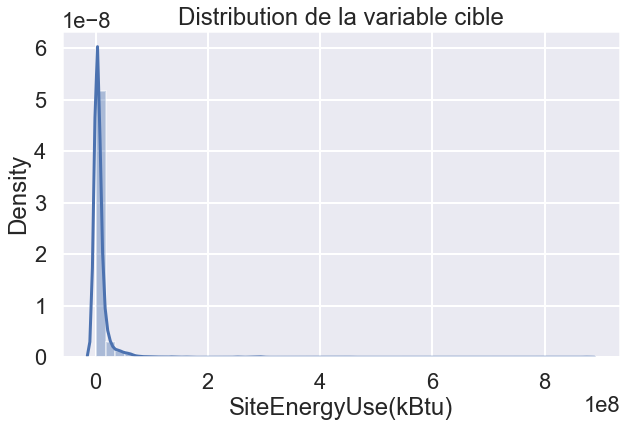

In [132]:
plt.figure(figsize=(10,6))
plt.title('Distribution de la variable cible')
sns.distplot(df6['SiteEnergyUse(kBtu)'])

In [133]:
# Transformation de la variable cible 'SiteEnergyUse(kBtu)'

df7=df1.select_dtypes(include = ['int32','float64'])
y_trans = np.log1p(df7['SiteEnergyUse(kBtu)'])
#y_trans = np.log2(df7['SiteEnergyUse(kBtu)'])

In [134]:
y_trans.shape

(3309,)

In [135]:
# Reshape the variable target "y_trans"
y_trans=np.log1p(df7[['SiteEnergyUse(kBtu)']])
#y_trans=np.log2(df7[['SiteEnergyUse(kBtu)']])

In [136]:
y_trans.shape

(3309, 1)

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution de la variable cible transformee en log1p'}, ylabel='Density'>

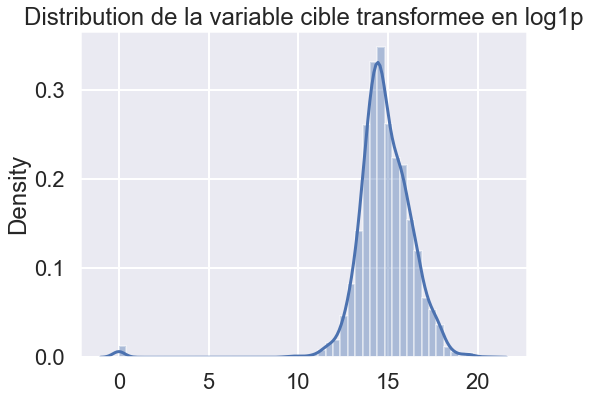

In [137]:
plt.figure(figsize=(8,6))
#plt.title('Distribution de la variable cible transformee en log2')
plt.title('Distribution de la variable cible transformee en log1p')
sns.distplot(y_trans)

On conserve la variable après la transformation log1p :

In [138]:
df6['Log1p-SiteEnergyUse(kBtu)'] = y_trans

In [139]:
df6.columns

Index(['BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'Latitude', 'Longitude',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'Building_age',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'Log1p-SiteEnergyUse(kBtu)'],
      dtype='object')

In [140]:
df6.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
NumberofBuildings                  0
NumberofFloors                     8
ENERGYSTARScore                 1098
Latitude                           0
Longitude                          0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
Building_age                       0
SiteEnergyUse(kBtu)                0
GHGEmissions(MetricTonsCO2e)       0
Log1p-SiteEnergyUse(kBtu)          0
dtype: int64

In [141]:
# Rows with 'SiteEnergyUse(kBtu)'=NaN

df6[df6['SiteEnergyUse(kBtu)'].isnull()]

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding(s),Building_age,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Log1p-SiteEnergyUse(kBtu)


In [142]:
#df_6.describe()

In [143]:
# Rename the columns of df7 'PropertyGFABuilding(s)': 'PropertyGFABuilding',  'SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'GHGEmissions(MetricTonsCO2e)':'GHGEmissions'

df6.rename(columns={'PropertyGFABuilding(s)': 'PropertyGFABuilding','SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'GHGEmissions(MetricTonsCO2e)':'GHGEmissions','Log1p-SiteEnergyUse(kBtu)':'Log1p-SiteEnergyUse'}, inplace=True)

In [144]:
df6.head(2)

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,PropertyGFAParking,PropertyGFABuilding,Building_age,SiteEnergyUse,GHGEmissions,Log1p-SiteEnergyUse
0,NonResidential,Hotel,1.0,12.0,65.0,47.612190,-122.337997,0.0,88434.0,88.0,6981428.0,249.43,15.758764
1,NonResidential,Hotel,1.0,11.0,51.0,47.613106,-122.333358,15064.0,88502.0,19.0,8354235.0,263.51,15.938279


In [145]:
df6.to_csv("df6.csv", index=False)

In [146]:
df6.shape

(3309, 13)